In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

This is the format of your plot grid:
[ (1,1) x1,y1 ]      (empty)    
[ (2,1) x1,y2 ]  [ (2,2) x2,y2 ]



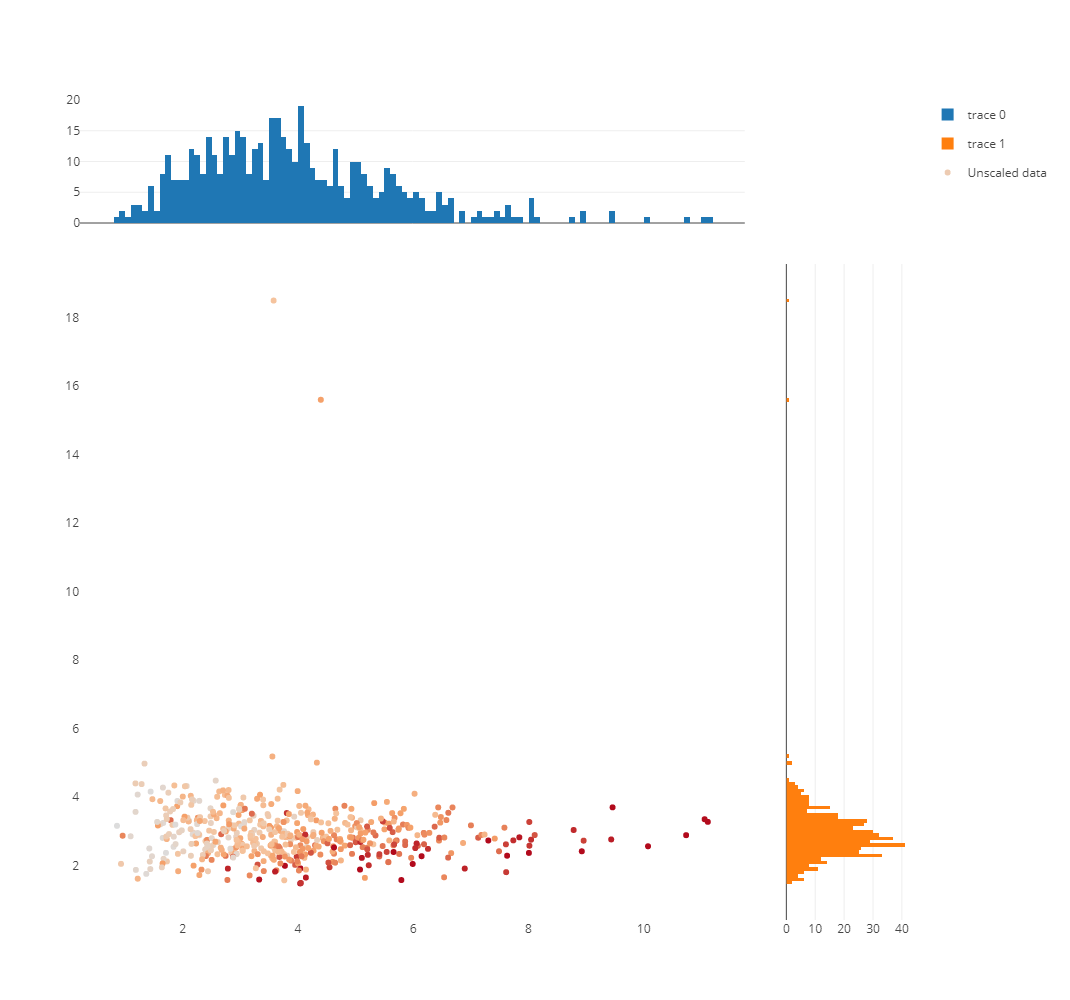

In [3]:
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import numpy as np
from sklearn.preprocessing import *
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

sub_samples = np.random.choice(np.arange(X_full.shape[0]),size=500)
X = X_full[:, [0, 5]][sub_samples]

distributions = dict([
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
])

y = minmax_scale(y_full)[sub_samples]
# scale the output between 0 and 1 for the colorbar

# 
fig = plotly.tools.make_subplots(rows=2,cols=2,specs=[[{},None],[{},{}]],shared_xaxes=True,shared_yaxes=True)
#This is the format of your plot grid:
#[ (1,1) x1,y1 ]      (empty)    
#[ (2,1) x2,y2 ]  [ (2,2) x3,y3 ]
# 初始化了一个如上的一个figure布局，以便进行绘图

traces = []
for scaler,scaled_X in list(distributions.items())[:1]:
# 只画第一个的话，如下
    trace1 = go.Histogram(x=scaled_X[:,0],nbinsx=200)
    trace2 = go.Histogram(y=scaled_X[:,1],nbinsy=200)
    trace3 = go.Scatter(x=scaled_X[:,0],y=scaled_X[:,1],mode='markers',marker=dict(color=y),name=scaler,legendgroup=scaler)
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,2)
    fig.append_trace(trace3,2,1)

fig.layout.xaxis1.domain = [0,0.8]
fig.layout.xaxis2.domain = [0.85,1.0]
fig.layout.yaxis1.domain = [0.85,1.0]
fig.layout.yaxis2.domain = [0,0.8]
fig.layout.width = 1000
fig.layout.height = 1000
plotly.offline.iplot(fig)

In [1]:
1

1

In [4]:
fig = plotly.tools.make_subplots(rows=2,cols=2,specs=[[{},None],[{},{}]],shared_xaxes=True,shared_yaxes=True)
#This is the format of your plot grid:
#[ (1,1) x1,y1 ]      (empty)    
#[ (2,1) x2,y2 ]  [ (2,2) x3,y3 ]

traces = []
for scaler,scaled_X in distributions.items():
    trace1 = go.Histogram(x=scaled_X[:,0],nbinsx=200,showlegend=False,visible=False)
    trace2 = go.Histogram(y=scaled_X[:,1],nbinsy=200,showlegend=False,visible=False)
    trace3 = go.Scatter(x=scaled_X[:,0],
                        y=scaled_X[:,1],
                        mode='markers',
                        marker=dict(color=y),
                        showlegend=False,visible=False)
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,2)
    fig.append_trace(trace3,2,1)

init_v = [False] * len(fig.data)
buttons = []
for idx,name in enumerate(list(distributions.keys())):
    _cache = init_v[::]
    _cache[idx] = _cache[idx+1] = _cache[idx+2] = True
    button = dict(args=['visible',_cache],
                 label=name,
                 method='restyle')
    buttons.append(button)
fig.data[0]['visible'] = fig.data[1]['visible'] = fig.data[2]['visible'] = True
fig.layout.xaxis1.domain = [0,0.8]
fig.layout.xaxis2.domain = [0.85,1.0]
fig.layout.yaxis1.domain = [0.85,1.0]
fig.layout.yaxis2.domain = [0,0.8]
fig.layout.updatemenus = [dict(buttons=buttons)]
fig.layout.width = 1000
fig.layout.height = 1000
plotly.offline.plot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]      (empty)    
[ (2,1) x1,y2 ]  [ (2,2) x2,y2 ]



'file://D:\\temp-plot.html'